## Общая информация о проекте


**Описание проекта:** Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
*****
**Цель проекта:** Приоритизировать гипотезы, запуститить A/B-тест и проанализировать результаты. 

**План работы:**

- Загрузка данных и предобработка:
  - Загрузка библиотек и данных
  - Просмотр общей информации
  - Проверка на дубликаты и пропуски
  - Изменение названий столбцов
  - Работа с датами
  - Вывод
****  

**Часть 1. Приоритизация гипотез:**
- Применить фреймворк ICE для приоритизации гипотез;
- Применить фреймворк RICE для приоритизации гипотез; 
- Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. 
*****

**Часть 2. Анализ A/B-теста:**
- График кумулятивной выручки по группам;
- График кумулятивного среднего чека по группам;
- График относительного изменения кумулятивного среднего чека группы B к группе A;
- График кумулятивного среднего количества заказов на посетителя (конверсия) по группам;
- График относительного изменения кумулятивной конверсии посетителя группы B к группе A;
- Точечный график количества заказов по пользователям;
- 95-й и 99-й перцентили количества заказов на пользователя;
- Точечный график стоимостей заказов;
- 95-й и 99-й перцентили стоимости заказов;
- Статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным;
- Статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным;
- Статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным;
- Статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным;
- Решение по результатам теста.

*****

**Описание датасетов:**

**Данные для первой части**

Файл */datasets/hypothesis.csv*

Hypothesis — краткое описание гипотезы;

Reach — охват пользователей по 10-балльной шкале;

Impact — влияние на пользователей по 10-балльной шкале;

Confidence — уверенность в гипотезе по 10-балльной шкале;

Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.
****

**Данные для второй части** 

Файл */datasets/orders.csv*

transactionId — идентификатор заказа;

visitorId — идентификатор пользователя, совершившего заказ;

date — дата, когда был совершён заказ;

revenue — выручка заказа;

group — группа A/B-теста, в которую попал заказ.
*****

Файл */datasets/visitors.csv*

date — дата;

group — группа A/B-теста;

visitors — количество пользователей в указанную дату в указанной группе A/B-теста


## Загрузка данных и предобработка

### Загрузка библиотек и данных

In [1]:
#импортируем нужные библиотеки
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
import scipy.stats as stats

In [2]:
# грузим наши таблицы
hypothesis, orders, visitors = (
    pd.read_csv('/datasets/hypothesis.csv'),# гипотезы
    pd.read_csv('/datasets/orders.csv'),  # заказы
    pd.read_csv('/datasets/visitors.csv'),  # пользователи
)


### Просмотр общей информации

In [3]:
display(hypothesis.head())
display(orders.head())
display(visitors.head())

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [4]:
display(hypothesis.info())
display(orders.info())
display(visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

### Проверка на дубликаты и пропуски

In [5]:
# проверка на явные дубликаты
print(f'Дубликатов обнаружено:{hypothesis.duplicated().sum()}')
print(f'Дубликатов обнаружено:{orders.duplicated().sum()}')
print(f'Дубликатов обнаружено:{visitors.duplicated().sum()}')

Дубликатов обнаружено:0
Дубликатов обнаружено:0
Дубликатов обнаружено:0


In [6]:
# проверяем на пропуски
display(hypothesis.isna().sum().sort_values())
display(orders.isna().sum().sort_values())
display(visitors.isna().sum().sort_values())

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

date        0
group       0
visitors    0
dtype: int64

### Изменение названий столбцов

Названия колонок в таблице hypothesis в верхнем регистре., для удобства работы переведём в нижний:

In [7]:
hypothesis.columns = hypothesis.columns.str.lower()

В таблице orders тоже изменим названия:

In [8]:
orders = orders.rename(columns = {'transactionId':'transaction_id', 'visitorId':'visitor_id'})

### Работа с датами

У даты в таблице пользователей и в таблице заказов формат object, исправим это:

In [9]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
    
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

### Проверка дубликатов по группам

In [10]:
# #проверим, есть ли пользователи, которые попали в  обе группы
two_groups = orders.groupby('visitor_id').agg({'group':'nunique'})
two_groups = two_groups.query('group > 1')

print(f'Пользователей, попавших в обе группы:',two_groups['group'].count())

Пользователей, попавших в обе группы: 58


### Выводы


- Мы работаем с тремя таблицами, содержащими сведения о гипотезах, заказах и пользователях
- Дубликатов и пропусков в данных не обнаружено
- В таблице гипотез и заказов названия колонок были приведены к более удобному в работе виду
- Скорректирован формат даты в таблице пользователей и в таблице заказов
- Было обнаружено 58 пользователей, которые каким-то образом попали в обе группы и влияют на чистоту тестирования. В А-Б тестах подобного лучше избегать.

## Часть 1. Приоритизация гипотез

- Применить фреймворк ICE для приоритизации гипотез;
- Применить фреймворк RICE для приоритизации гипотез;
- Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE.

### Применить фреймворк ICE для приоритизации гипотез

Формула расчета ICE = (impact * confidence) / efforts

In [11]:
hypothesis['ICE'] = (hypothesis.impact *  hypothesis.confidence) / hypothesis.efforts
ice = hypothesis[['hypothesis','ICE']].sort_values( by ='ICE', ascending=False)
ice 

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.200000
0,"Добавить два новых канала привлечения трафика,...",13.333333
7,Добавить форму подписки на все основные страни...,11.200000
6,Показать на главной странице баннеры с актуаль...,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000
1,"Запустить собственную службу доставки, что сок...",2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",1.333333
3,"Изменить структура категорий, что увеличит кон...",1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000000


 **Вывод:** Согласно ICE самые приоритетные гипотезы восьмая, нулевая и седьмая

### Применить фреймворк RICE для приоритизации гипотез

Формула расчета RICE = (reach * impact * confidence) / efforts

In [12]:
hypothesis['RICE'] = (hypothesis.reach * hypothesis.impact *  hypothesis.confidence) / hypothesis.efforts
rice = hypothesis[['hypothesis','RICE']].sort_values( by ='RICE', ascending=False)
rice 

,hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


**Вывод:** Согласно RICE самые приоритетные гипотезы это седьмая, вторая и нулевая

### Сравнение ICE и RICE

In [13]:
ice_reach= round(hypothesis[['hypothesis','reach','ICE']].sort_values( by ='ICE', ascending=False),3)
rice_reach = hypothesis[['hypothesis','reach','RICE']].sort_values( by ='RICE', ascending=False)

pd.set_option('display.max_colwidth',None)
display(ice_reach)
display(rice_reach)

,hypothesis,reach,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,16.200
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,13.333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,11.200
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,8.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,7.000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,2.000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,1.333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,1.125
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1.000


,hypothesis,reach,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,3.0


**Вывод:**  Мы видим, что по двум фреймворкам у нас разные приоритеты. Восьмая  гипотеза, что по ICE получила самый высший приоритет, не попала в топ по фреймворку RICE(пятое место), вторая гипотеза, которая в топе по RICE, в ICE занимает пятое место, а нулевая и седьмая гипотеза попадает в топ-3 по обоим фреймворкам. 

### Выводы



- Согласно ICE самые приоритетные гипотезы:
        - 8. Запустить акцию, дающую скидку на товар в день рождения;
        - 0. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
        - 7. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.       
- Согласно RICE самые приоритетные гипотезы:
        - 7. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок; 
        - 2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа;
        - 0. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.
- Разные приоритеты гипотез по фреймворкам ICE и RICE связаны с тем, что в формуле RICE есть допонительный параметр reach, связанный с охватом пользователей и восьмая  гипотеза , что по ICE получила самый высший приоритет, в параметре reach оценены на 1, а нулевая и седьмая гипотеза попадает в топ-3 по обоим фреймворкам.

## Часть 2. Анализ A/B-теста

- Сбор кумулятивных данных;
- График кумулятивной выручки по группам;
- График кумулятивного среднего чека по группам;
- График относительного изменения кумулятивного среднего чека группы B к группе A;
- График кумулятивного среднего количества заказов на посетителя (конверсия) по группам;
- График относительного изменения кумулятивной конверсии посетителя группы B к группе A;
- Точечный график количества заказов по пользователям;
- 95-й и 99-й перцентили количества заказов на пользователя;
- Точечный график стоимостей заказов;
- 95-й и 99-й перцентили стоимости заказов;
- Подготовка "сырых" данных для анализа;
- Статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным;
- Статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным;
- Подготовка "очищенных" данных для анализа;
- Статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным;
- Статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным;
- Решение по результатам теста.

### Сбор кумулятивных данных

Чтобы построить графики, нужно собрать кумулятивные данные.
****

Объявим датафрейм *cumulativeData* со столбцами:

date — дата;

group — группа A/B-теста (A или B);

orders — кумулятивное количество заказов на указанную дату в указанной группе;

buyers — кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;

revenue — кумулятивная выручка на указанную дату в указанной группе (средний чек);

visitors — кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе.

In [14]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 

In [15]:
# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [16]:
# получаем агрегированные кумулятивные по дням данные о посетителях 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [17]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


### График кумулятивной выручки по группам

In [18]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'orders']]
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]


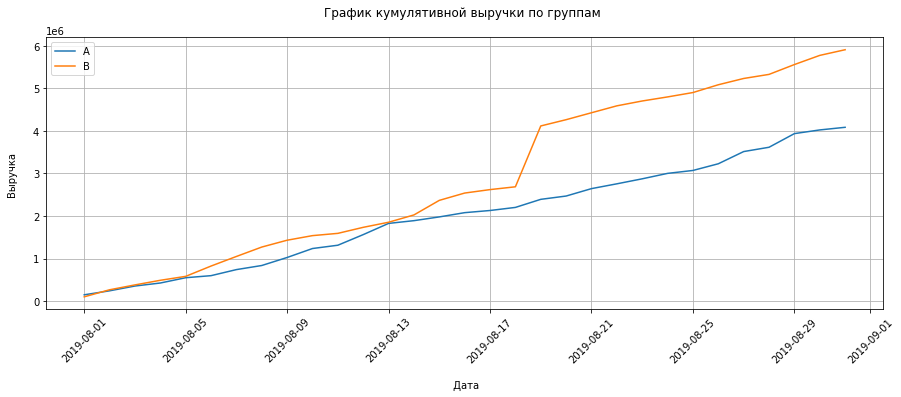

In [19]:
plt.figure(figsize=(15,5))

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('График кумулятивной выручки по группам \n')
plt.xlabel("\n Дата")
plt.ylabel("Выручка\n ")
plt.grid()
plt.xticks(rotation=45)
plt.legend();
        

**Вывод:** 
По графику видно, что кумулятивная выручка в обеих группах растет(что указывает на верность наших расчетов, ведь кумулятивная вырручка не может уменьшаться). В группе В рост выручки более стремительный, а в группе А более плавный. В группе В присутствует в данных резкий скачок 18 числа, что указывает на возможный выброс в данных.

### График кумулятивного среднего чека по группам

Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:

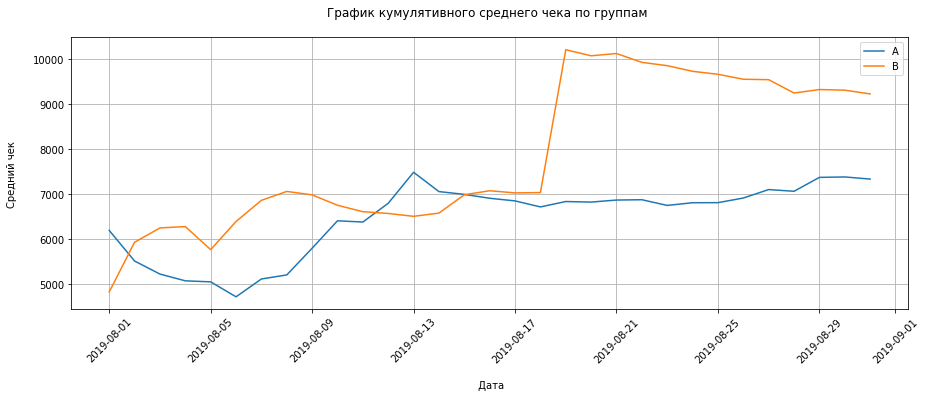

In [20]:
plt.figure(figsize=(15,5))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.title('График кумулятивного среднего чека по группам \n')
plt.xlabel("\n Дата")
plt.ylabel("Средний чек\n ")
plt.grid()
plt.xticks(rotation=45)
plt.legend();

**Вывод:** На данном графике еще очевиднее резкий скачок 18-ого числа.  В группее А средний чек выравнивается примерно после 14-ого числа. В группе В, после скачка, средний чек постепенно снижается.

### График относительного изменения кумулятивного среднего чека группы B к группе A;

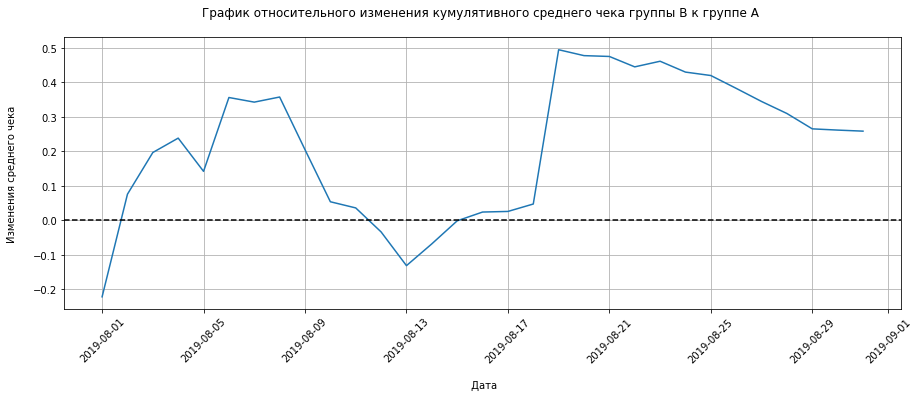

In [21]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(15,5))

plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A \n')
plt.xlabel("\n Дата")
plt.ylabel("Изменения среднего чека\n ")
plt.grid()
plt.xticks(rotation=45);

**Выводы:** В нескольких точках графика различия между сегментами резко «скачет». Явно в данных присутствуют выбросы. 

### График кумулятивного среднего количества заказов на посетителя (конверсия) по группам

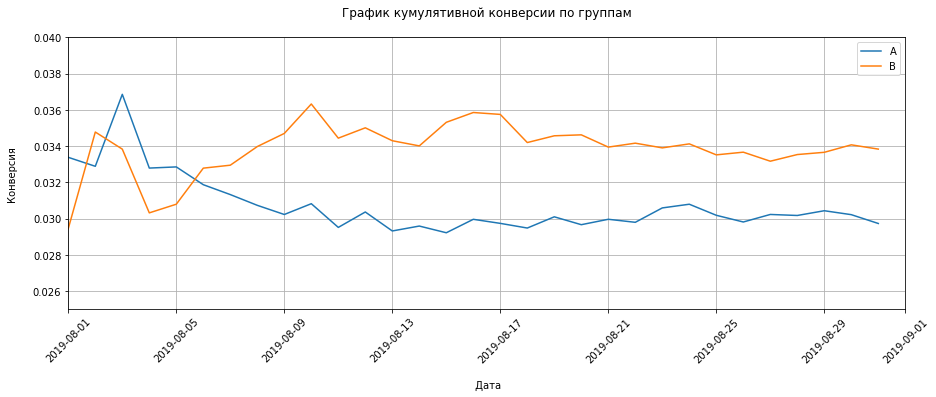

In [22]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(15,5))

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.title('График кумулятивной конверсии по группам\n')
plt.xlabel("\n Дата")
plt.ylabel("Конверсия\n ")
plt.grid()
plt.xticks(rotation=45)
plt.legend()

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0.025, 0.04]);


**Вывод:**  Мы видим скачки конверсии в начале периода, после 10-ого числа конверсия в обеих группах выравнивается  и конверсия в группе В стабильно выше конверсии в группе А.

### График относительного изменения кумулятивной конверсии посетителя группы B к группе A

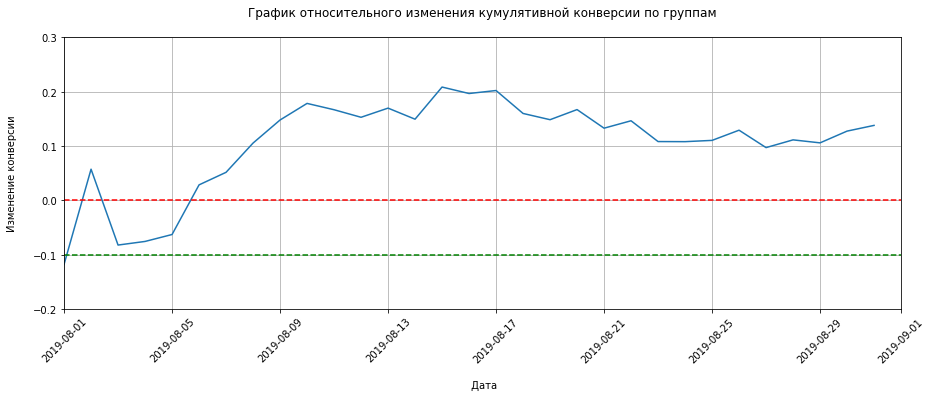

In [23]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# строим графики
plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)


plt.axhline(y=0, color='red', linestyle='--')
plt.axhline(y=-0.1, color='green', linestyle='--')
plt.title('График относительного изменения кумулятивной конверсии по группам\n')
plt.xlabel("\n Дата")
plt.ylabel("Изменение конверсии\n ")
plt.grid()
plt.xticks(rotation=45)

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), -0.2, 0.3]);

**Вывод:**   В начале теста группа B проигрывала группе A( не считая аномального скачка примерно 3 числа), затем вырвалась вперёд, теперь конверсия постепенно растёт.
Стоит проанализировать аномалии, возможно, они изменят картину.

### Точечный график количества заказов по пользователям

Сгруппируем заказы по пользователям, подсчитаем число уникальных заказов по сгруппированным данным, отсортируем датафрейм по значению в столбце. Переименуем колонки.

In [24]:
ordersByUsers = orders \
                    .groupby('visitor_id', as_index=False) \
                    .agg({'transaction_id' : 'nunique',}) \
                    .sort_values(by='transaction_id',ascending=False)

ordersByUsers.columns = ['visitor_id', 'orders']

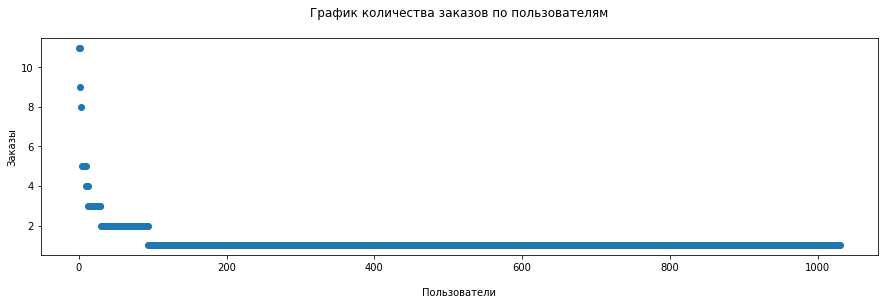

In [25]:
# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))

# строим график
plt.figure(figsize=(15,4))
plt.scatter(x_values, ordersByUsers['orders']) 

plt.title('График количества заказов по пользователям\n')
plt.xlabel('\nПользователи')
plt.ylabel('Заказы');

**Вывод:** Большая часть пользователей совершает один заказ, но есть пользователи, совершившие более десятка заказов

### 95-й и 99-й перцентили количества заказов на пользователя

In [26]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

**Вывод:** 95% пользователей совершили до двух заказов включительно. И только 1% совершили больше 4 заказов

### Точечный график стоимостей заказов

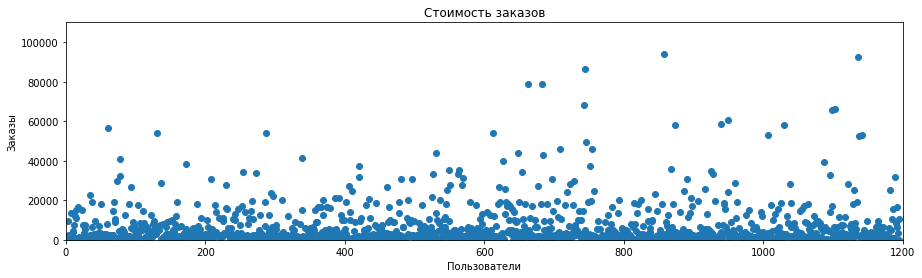

In [27]:
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.figure(figsize=(15,4))
plt.scatter(x_values, orders['revenue']) 

plt.title('Стоимость заказов')
plt.xlabel('Пользователи')
plt.ylabel('Заказы')
plt.axis([0, 1200, 0, 110000]);

**Вывод:** Судя по полученному графику, большая часть заказов стоимостью до 20 000, но есть редкие заказы до почти 100 000

### 95-й и 99-й перцентили стоимости заказов

In [28]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

**Вывод:** Как мы видим, 95% всех заказов имеют стоимость до 28 000, и только 1 % всех заказов стоит дороже 58 233

### Статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Сформулируем гипотезы:

- H_0: Различий в  среднем количестве заказов на посетителя между группами нет;

- H_a: Различия в  среднем количестве заказов на посетителя между группами есть.

alpha = 0.05

Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['user_id', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 

In [29]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['user_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['user_id', 'orders'] 

Разделим таблицу с кумулятивными данными по группам:

In [30]:
cumulativeDataA = cumulativeData.query('group == "A"')

In [31]:
cumulativeDataB =  cumulativeData.query('group == "B"')

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [32]:
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                cumulativeDataA['visitors'].max() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                cumulativeDataB['visitors'].max() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Выведем относительный прирост среднего числа заказов группы B: среднее число заказов группы B / среднее число заказов группы A - 1.  Округлим до трёх знаков после запятой.

In [33]:
p_value = stats.mannwhitneyu(sampleA, sampleB)[1]
alpha = 0.05 

if (p_value < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

    
    
print('p-значение: ',"{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('относительный прирост:'"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

Отвергаем нулевую гипотезу
p-значение:  0.017
относительный прирост:0.138


**Вывод:**  Как мы видим, статистическая значимость различий в среднем количестве заказов на посетителя между группами по "сырым" данным наблюдается. Отдельный прирост конверсии группы В к конверсии группы А равен 13.8% 

### Статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

Сформулируем гипотезы:

- H_0: Различий в среднем чеке между группами нет.;

- H_a: Различия в среднем чеке между группами есть.

alpha = 0.05

In [34]:
p_value = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]
alpha = 0.05

if (p_value < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

print('p-значение: ','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('относительный прирост:','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

Не получилось отвергнуть нулевую гипотезу
p-значение:  0.729
относительный прирост: 0.259


**Вывод:** P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. 

Относительное различие среднего чека между группами 25.9%.  Однако, в наших "сырых" данных присутствуют аномалии, с которыми нужно поработать

### Подготовка "очищенных" данных для анализа

Найденные  95-й и 99-й перцентили средних чеков равны 28 000 и 58 233.2м. А 95-й и 99-й перцентили количества заказов на одного пользователя равны 2 и 4 заказа на пользователя.

Примем за аномальных пользователей тех, кто совершил от 2 заказов или совершил заказ дороже 28 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и  5% пользователей с дорогими заказами.

Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 28 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers. 

In [35]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['user_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['user_id'],
    ],
    axis=0,
)

usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitor_id']

abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

print(abnormalUsers.head())
print(abnormalUsers.shape[0]) 

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64
74


Как мы видим, аномальных пользователей всего 74. Далее увидим, как же сильно они влияли на наши данные.

###  Статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Сформулируем гипотезы:

- H_0: Различий в  среднем количестве заказов на посетителя между группами нет;

- H_a: Различия в  среднем количестве заказов на посетителя между группами есть.

alpha = 0.05

Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [36]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['user_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                cumulativeDataA['visitors'].max() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['user_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                cumulativeDataA['visitors'].max() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

Применим статистический критерий Манна-Уитни к полученным выборкам:

In [37]:
p_value = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]
alpha = 0.05 

if (p_value < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


print('p-значение: ','{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('относительный прирост:','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

Отвергаем нулевую гипотезу
p-значение:  0.008
относительный прирост: 0.184


**Вывод:** Как мы видим различия между "сырыми" и "очищенными" данными наблюдаются, однако нулевая гипотеза отвергнута в обоих случаях. Относительное различие группы В относительно группы А равно 18.4%

### Статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

Сформулируем гипотезы:

H_0: Различий в среднем чеке между группами нет.;

H_a: Различия в среднем чеке между группами есть.

alpha = 0.05

In [38]:
p_value = stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
alpha = 0.05 

if (p_value < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")



print('p-значение: ',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('относительный прирост:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

Не получилось отвергнуть нулевую гипотезу
p-значение:  0.738
относительный прирост: -0.020


**Выводы:** В данном случае, очистка  данных практически не изменила p-value, нулевая гипотеза отвергается в обоих случаях, поэтому статистически значимых отличий между группами нет. Относительное различие среднего чека между группами на "очищенных" данных упало с  25.9% до -2%.

### Решение по результатам теста

По результатам A/B-теста принимаем решение остановить тест, признать его успешным, зафиксировать победу группы B.

- Мы обнаружили статистически значимое различие по конверсии между группами, причём как по "сырым" данным, так и по "очищенным" от аномалий;

- Конверсия группы B увеличилась по сравнению с конверсией группы А;

- Статистически значимых различий в среднем чеке между группами не было обнаружено.


## Выводы

### Для исследования нами были получены данные, содержащие информацию о гипотезах (предполагающих увеличение выручки магазина), о заказах и о посетителях сайта.

Мы загрузили наши данные и провели предоработку: посмотрели общую информацию, привели названия столбцов к более удобному  для работы виду, изменили формат даты, провели проверки на дубликаты и пропуски в данных.

****

- В первой части основного исследования мы ознакомились с таблицей данных о гипотезах и занялись приоритизацией гипотез. Для анализа были использованы фреймворки ICE и RICE.
    По результатам исследования, можно сделать следующие выводы:

    Согласно фреймворку ICE самые приоритетные гипотезы:
    
        - 8. Запустить акцию, дающую скидку на товар в день рождения;
          
        - 0. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
          
        - 7. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.
          
    Согласно  фреймворку RICE самые приоритетные гипотезы:
    
        - 7. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок; 
          
        - 2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа;
          
        - 0. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.
  
  Разные приоритеты гипотез по фреймворкам ICE и RICE связаны с тем, что в формуле RICE есть допонительный параметр reach, связанный с охватом пользователей и восьмая гипотеза, что по ICE получила самый высший приоритет, в параметре reach оценена на 1, а нулевая и седьмая гипотеза попадает в топ-3 по обоим фреймворкам.

****

- Во второй части основного исследования мы провели анализ результатов А-В теста и расмотрели статистическую значимость различий между группами на "сырых" и "очищенных" данных.

   Согласно нашему исследованию, найденные  95-й и 99-й перцентили средних чеков равны 28 000 и 58 233.2м. А 95-й и 99-й перцентили количества заказов на одного пользователя равны 2 и 4.

   За аномальные значения были приняты пользователи, совершившие от 2 заказов или сделавшие заказ дороже 28 000 рублей. Таким образом, мы убрали 5% пользователей с наибольшим числом заказов и  5% пользователей с самыми дорогими заказами. Таких пользователей в наших данных оказалось 74.

         - По количеству заказов:
            Статистическая значимость различий в среднем количестве заказов на посетителя между группами наблюдается как по "сырым" данным, так и по "очищенным".  Отдельный прирост конверсии группы В к конверсии группы А по "сырым" данным равен 13.8%. Относительное различие группы В от группы А  по "очищенным" данным равно 18.4%
            
         - По среднему чеку:
             Статистическая значимость различий в среднем чеке между группами  не наблюдается как по "сырым" данным, так и по "очищенным".  Относительное различие среднего чека между группами на "очищенных" данных упало с  25.9%  в пользу группы В до 2% в пользу группы А.
*****

- Исходя из полученных результатов исследования, было принято решение остановить А-В тест и зафиксировать победу группы В. Несмотря на то, что средний чек не изменился, разница конверсий наблюдается в пользу группы В на обоих видах данных, а значит можно прогнозировать рост выручки.

             